In [2]:
!pip install pandas
!pip install missingno

In [3]:
import pandas as pd

In [4]:
!pip install wget


In [5]:
import wget

In [6]:
# Load data from our dataset file into a pandas dataframe
wget.download("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv", "titanic.csv")
wget.download("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py", "graphing.py")

'graphing (1).py'

In [7]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)


In [9]:
# Calculate the number of empty cells in each column
# The following line consists of three commands. Try
# to think about how they work together to calculate
# the number of missing entries per column
missing_data = dataset.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


<Axes: >

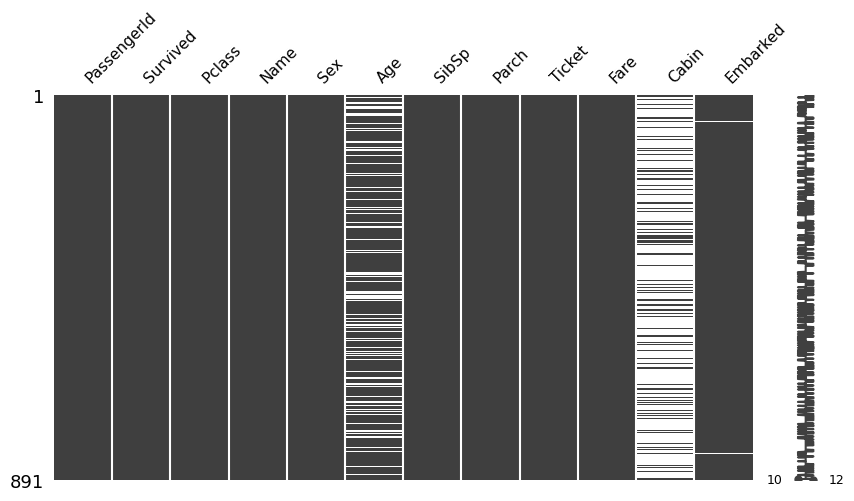

In [10]:
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

In [11]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown_age = dataset[dataset["Age"].isnull()]

# Print only the columns we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [12]:
# Find those passengers with missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those passengers missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


Text(0, 0.5, 'Passenger Count')

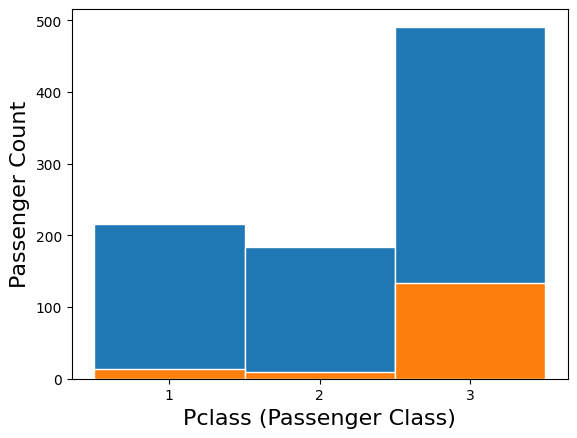

In [13]:
import matplotlib.pyplot as plt

plt.hist((dataset.values[:,2]),bins=[0.5, 1.5, 2.5, 3.5],edgecolor="white")
plt.hist((unknown_age_and_cabin.values[:,2]),bins=[0.5, 1.5, 2.5, 3.5],edgecolor="white")
plt.xticks([1, 2, 3])
plt.xlabel("Pclass (Passenger Class)", fontsize=16)
plt.ylabel("Passenger Count", fontsize=16)

In [14]:
import numpy as np

# Print out the average age of passengers for whom we have age data
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now, make another model where missing ages contained a '0'
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


Text(0, 0.5, 'Passenger Count')

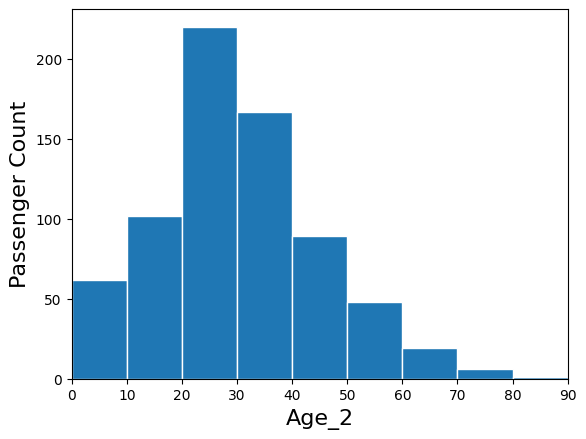

In [15]:
plt.hist(dataset["Age"],bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],edgecolor="white")
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xlim([0, 90])
plt.xlabel("Age_2", fontsize=16)
plt.ylabel("Passenger Count", fontsize=16)

### Option 1: Delete data with missing rows

In [16]:

# Create a "clean" dataset, where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


### Option 2: Replace empty values with the mean or median for that data.


In [17]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


C:\Users\rajbe\AppData\Local\Temp\ipykernel_9924\972590070.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_dataset["Age"].fillna(mean_age, inplace=True)


### Option 3: Assign a new category to unknown categorical data

In [18]:
# Assign unknown to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


C:\Users\rajbe\AppData\Local\Temp\ipykernel_9924\1562811783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_dataset["Cabin"].fillna("Unknown", inplace=True)


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_2        891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [26]:
!pip install graphing
!pip install plotly
!pip install nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached attrs-24.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.22.3-cp313-cp313-win_amd64.whl.metadata (4.2 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached attrs-24.3.0-py3-none-any.whl (63 kB)
Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Using cached rpds_py-0.22.3-cp313-cp313-win_amd64.whl (235 kB)


In [28]:
import graphing
import nbformat

graphing.histogram(dataset, label_x='Pclass', label_y='Survived', histfunc='avg', include_boxplot=True)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': 'Pclass=%{x}<br>avg of Survived=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([3, 1, 3, ..., 3, 1, 3], shape=(891,)),
              'xaxis': 'x',
              'y': array([0, 1, 1, ..., 0, 1, 0], shape=(891,)),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Pclass=%{x}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'showlegend': False,
              'type': 'box',
              'x': array([3, 1, 3, ..., 3, 1, 3], shape=(891,)),
              'xaxis': 'x2',
              'yaxis': 'y2'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Pclass'}},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x', 'showgrid': True, 'showticklabels': False},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 0.8316], 'title': {'text': 'avg of Survived'}},
               'yaxis2': {'anchor': 'x2',
                          'domain': [0.8416, 1.0],
                          'matches': 'y2',
                          'showgrid': False,
                          'showline': False,
                          'showticklabels': False,
                          'ticks': ''}}
})

In [29]:
graphing.multiple_histogram(dataset, 
                            label_x='Pclass', # group by ticket class
                            label_group="Parch", # colour by no parents or children
                            label_y='Survived', 
                            histfunc="avg")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'histfunc': 'avg',
              'name': '0',
              'type': 'histogram',
              'x': array([3, 1, 3, ..., 1, 1, 3], shape=(678,)),
              'y': array([0, 1, 1, ..., 1, 1, 0], shape=(678,))},
             {'histfunc': 'avg',
              'name': '1',
              'type': 'histogram',
              'x': array([3, 3, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1, 3, 2, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3,
                          2, 3, 3, 3, 1, 3, 2, 1, 3, 1, 2, 1, 3, 3, 1, 2, 2, 1, 2, 3, 1, 1, 2, 3,
                          3, 1, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 2, 1, 2,
                          1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 1, 3, 1, 3, 3, 2, 1, 3, 2,
                          3, 2, 1, 3, 3, 2, 3, 2, 1, 3, 3, 2, 1, 2, 3, 1, 3, 1, 3, 1, 1, 2]),
              'y': array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
                          1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
                          0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
                          1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
                          1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])},
             {'histfunc': 'avg',
              'name': '2',
              'type': 'histogram',
              'x': array([3, 1, 2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
                          2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 1, 3, 1, 2, 2, 3,
                          1, 2, 3, 2, 1, 1, 3, 3, 1, 1, 3, 2, 2, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 3,
                          1, 3, 3, 2, 3, 3, 3, 3]),
              'y': array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                          1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
                          0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
                          1, 0, 0, 1, 0, 0, 0, 0])},
             {'histfunc': 'avg',
              'name': '3',
              'type': 'histogram',
              'x': array([3, 2, 3, 2, 3]),
              'y': array([0, 1, 0, 1, 1])},
             {'histfunc': 'avg', 'name': '4', 'type': 'histogram', 'x': array([3, 3, 1, 3]), 'y': array([0, 0, 0, 0])},
             {'histfunc': 'avg',
              'name': '5',
              'type': 'histogram',
              'x': array([3, 3, 3, 3, 3]),
              'y': array([0, 1, 0, 0, 0])},
             {'histfunc': 'avg', 'name': '6', 'type': 'histogram', 'x': array([3]), 'y': array([0])}],
    'layout': {'legend': {'title': {'text': 'Parch'}},
               'template': '...',
               'xaxis': {'title': {'text': 'Pclass'}},
               'yaxis': {'title': {'text': 'avg of Survived'}}}
})

In [30]:
graphing.scatter_2D(dataset, label_x="Age", label_y="Fare")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Age=%{x}<br>Fare=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'size': 3, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([22., 38., 26., ..., nan, 26., 32.], shape=(891,)),
              'xaxis': 'x',
              'y': array([ 7.25  , 71.2833,  7.925 , ..., 23.45  , 30.    ,  7.75  ], shape=(891,)),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Age'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Fare'}}}
})

In [ ]:
#One hot encoding

In [34]:
wget.download("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0c_logistic_regression.py", "m0c_logistic_regression.py")

'm0c_logistic_regression.py'

In [35]:
# Open our dataset from file
dataset = pd.read_csv("titanic.csv", index_col=False, sep=",", header=0)

# Fill missing cabin information with 'Unknown'
dataset["Cabin"].fillna("Unknown", inplace=True)

# Remove rows missing Age information
dataset.dropna(subset=["Age"], inplace=True)

# Remove the Name, PassengerId, and Ticket fields
# This is optional; it makes it easier to read our print-outs
dataset.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

dataset.head()

C:\Users\rajbe\AppData\Local\Temp\ipykernel_9924\2185143608.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [42]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 16.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.1 MB 12.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.5 MB/s eta 0:00:00


In [43]:
from m0c_logistic_regression import train_logistic_regression

features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
loss_numerical_only = train_logistic_regression(dataset, features)

print(f"Numerical-Only, Log-Loss (cost): {loss_numerical_only}")

Numerical-Only, Log-Loss (cost): 0.6121682789483452


In [44]:
# Swap male / female with numerical values
# We can do this because there are only two categories
dataset["IsFemale"] = dataset.Sex.replace({'male':0, 'female':1})

# Print out the first few rows of the dataset
print(dataset.head())

# Run and test the model, also using IsFemale this time
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", "IsFemale"] 
loss_binary_categoricals = train_logistic_regression(dataset, features)

print(f"\nNumerical + Sex, Log-Loss (cost): {loss_binary_categoricals}")

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked  \
0         0       3    male  22.0      1      0   7.2500  Unknown        S   
1         1       1  female  38.0      1      0  71.2833      C85        C   
2         1       3  female  26.0      0      0   7.9250  Unknown        S   
3         1       1  female  35.0      1      0  53.1000     C123        S   
4         0       3    male  35.0      0      0   8.0500  Unknown        S   

   IsFemale  
0         0  
1         1  
2         1  
3         1  
4         0  

Numerical + Sex, Log-Loss (cost): 0.4707118586956134


C:\Users\rajbe\AppData\Local\Temp\ipykernel_9924\3184598399.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [46]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {dataset['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pd.get_dummies(dataset, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = dataset.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [3 1 2]


,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale,Pclass_1,Pclass_2,Pclass_3,Pclass
0,0,male,22.0,1,0,7.2500,Unknown,S,0,False,False,True,3
1,1,female,38.0,1,0,71.2833,C85,C,1,True,False,False,1
2,1,female,26.0,0,0,7.9250,Unknown,S,1,False,False,True,3
3,1,female,35.0,1,0,53.1000,C123,S,1,True,False,False,1
4,0,male,35.0,0,0,8.0500,Unknown,S,0,False,False,True,3


In [47]:
# Run and test the model, also using Pclass as a categorical feature this time
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"]

loss_pclass_categorical = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Log-Loss (cost): {loss_pclass_categorical}")


Numerical, Sex, Categorical Pclass, Log-Loss (cost): 0.4717353503703535


In [49]:
# Use Pandas to One-Hot encode the Cabin and Pclass categories
dataset_with_one_hot = pd.get_dummies(dataset, columns=["Pclass", "Cabin"], drop_first=False)

# Find cabin column names
cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

# Print out how many cabins there were
print(len(cabin_column_names), "cabins found")

# Make a list of features
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"] + \
            cabin_column_names

# Run the model and print the result
loss_cabin_categorical = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): {loss_cabin_categorical}")

135 cabins found

Numerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): 0.4600186822653977


In [50]:
# We have cabin names, like A31, G45. The letter refers to the deck that
# the cabin was on. Extract just the deck and save it to a column. 
dataset["Deck"] = [c[0] for c in dataset.Cabin]

print("Decks: ", sorted(dataset.Deck.unique()))

# Create one-hot vectors for:
# Pclass - the class of ticket. (This could be treated as ordinal or categorical)
# Deck - the deck that the cabin was on
dataset_with_one_hot = pd.get_dummies(dataset, columns=["Pclass", "Deck"], drop_first=False)

# Find the deck names
deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))
 
features = ["Age", "IsFemale", "SibSp", "Parch", "Fare", 
            "Pclass_1", "Pclass_2", "Pclass_3",
            "Deck_A", "Deck_B", "Deck_C", "Deck_D", 
            "Deck_E", "Deck_F", "Deck_G", "Deck_U", "Deck_T"]

loss_deck = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nSimplifying Cabin Into Deck, Log-Loss (cost): {loss_deck}")

Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']

Simplifying Cabin Into Deck, Log-Loss (cost): 0.4588208415238718


In [52]:
# Use a dataframe to create a comparison table of metrics
# Copy metrics from previous Unit

l =[["Numeric Features Only", loss_numerical_only],
    ["Adding Sex as Binary", loss_binary_categoricals],
    ["Treating Pclass as Categorical", loss_pclass_categorical],
    ["Using Cabin as Categorical", loss_cabin_categorical],
    ["Using Deck rather than Cabin", loss_deck]]

pd.DataFrame(l, columns=["Dataset", "Log-Loss (Low is better)"])

,Dataset,Log-Loss (Low is better)
0,Numeric Features Only,0.612168
1,Adding Sex as Binary,0.470712
2,Treating Pclass as Categorical,0.471735
3,Using Cabin as Categorical,0.460019
4,Using Deck rather than Cabin,0.458821
